Primero observamos las columnas que tiene el dataset, que tipo de variables son cuántas son nulas.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.optimize import linear_sum_assignment

In [ ]:
df = pd.read_csv("cancer patient data sets.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

Analizamos los datos para saber cuáles son los valores mínimos y máximos que toman cada variable.

In [ ]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
print(df['Level'].value_counts())

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


In [ ]:
cancer_data = df.drop(columns=["Patient Id", "Level", "index"])

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer_data)

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, columns=cancer_data.columns)

# Agrupamiento con K-means

In [ ]:
# Aplicar K-means con 3 clústeres (posibles grupos: Low, Medium y High)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Obtener etiquetas de clúster asignadas
scaled_data_df['cluster'] = kmeans.labels_

In [ ]:
print("Conteo de pacientes en cada clúster:")
print(scaled_data_df['cluster'].value_counts())

Conteo de pacientes en cada clúster:
cluster
1    445
0    375
2    180
Name: count, dtype: int64


## Modelo en 2 dimensiones

In [ ]:
# Reducir dimensiones a 2D con PCA
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(scaled_data)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)*100:.2f}%")

Varianza total explicada: 51.32%


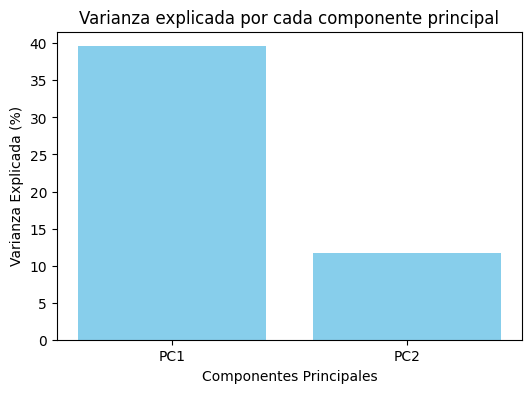

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(range(1, 3), pca.explained_variance_ratio_ * 100, tick_label=["PC1", "PC2"], color="skyblue")
plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada (%)")
plt.title("Varianza explicada por cada componente principal")
plt.show()

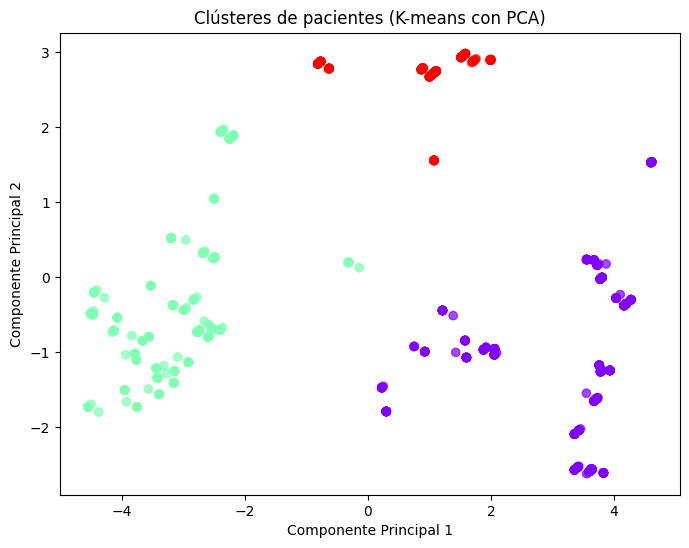

In [ ]:
# Visualizar los clústeres
plt.figure(figsize=(8, 6))
plt.scatter(cancer_pca[:, 0], cancer_pca[:, 1], c=scaled_data_df['cluster'], cmap='rainbow', alpha=0.7)
plt.title("Clústeres de pacientes (K-means con PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

## Modelo en 3 dimensiones

In [ ]:
# Reducir dimensiones a 3D con PCA
pca3 = PCA(n_components=3)
cancer_pca3 = pca3.fit_transform(scaled_data)
print(f"Varianza total explicada: {sum(pca3.explained_variance_ratio_)*100:.2f}%")

Varianza total explicada: 60.09%


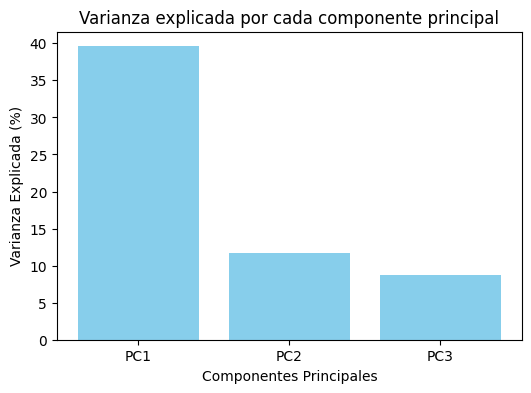

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(range(1, 4), pca3.explained_variance_ratio_ * 100, tick_label=["PC1", "PC2", "PC3"], color="skyblue")
plt.xlabel("Componentes Principales")
plt.ylabel("Varianza Explicada (%)")
plt.title("Varianza explicada por cada componente principal")
plt.show()

In [ ]:
import plotly.express as px

px.scatter_3d(x = cancer_pca3[:, 0], y = cancer_pca3[:, 1], z = cancer_pca3[:, 2], color = scaled_data_df['cluster'])

## Evaluación del modelo

In [ ]:
cancer_data['Level_encoded'] = LabelEncoder().fit_transform(df['Level'])

In [ ]:
conf_matrix = confusion_matrix(scaled_data_df['cluster'], cancer_data['Level_encoded'])

In [ ]:
# Invertir la matriz de confusión para maximizar la precisión
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

# Crear un mapeo óptimo
mapping = dict(zip(col_ind, row_ind))

In [ ]:
# Ajustar las etiquetas generadas por K-means con la correspondencia óptima
y_pred_mapped = np.array([mapping[label] for label in cancer_data['Level_encoded']])

In [ ]:
accuracy = accuracy_score(scaled_data_df['cluster'], y_pred_mapped)
print(f"Precisión después de la correspondencia óptima: {accuracy:.2f}")

Precisión después de la correspondencia óptima: 0.67


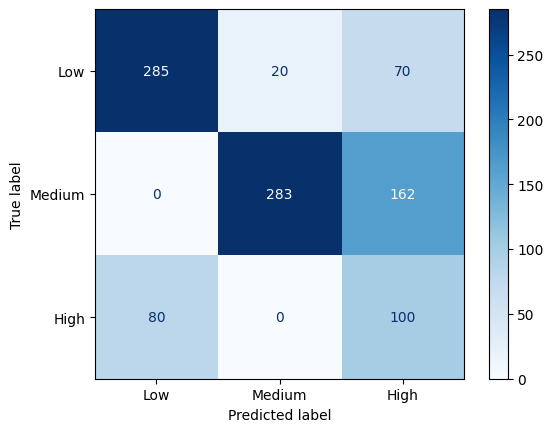

In [ ]:
labels = ['Low', 'Medium', 'High']

# Mostrar la matriz de confusión con etiquetas personalizadas
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')

In [ ]:
report = classification_report(scaled_data_df['cluster'], cancer_data['Level_encoded'])
print("Reporte de clasificación:\n", report)

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       375
           1       0.93      0.64      0.76       445
           2       0.30      0.56      0.39       180

    accuracy                           0.67      1000
   macro avg       0.67      0.65      0.64      1000
weighted avg       0.76      0.67      0.70      1000



# Agrupamiento con DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.5, min_samples=20)
dbscan.fit(scaled_data)

DBSCAN(min_samples=20)

In [ ]:
print(dbscan.labels_.min(), dbscan.labels_.max())

-1 9


In [ ]:
i = 0.6

dbscan = DBSCAN(eps=.5, min_samples=20)
dbscan.fit(scaled_data)

while dbscan.labels_.max() > 2:
    i += 0.1
    dbscan = DBSCAN(eps=i, min_samples=20)
    dbscan.fit(scaled_data)
    print(i, dbscan.labels_.min(), dbscan.labels_.max())

0.7 -1 12
0.7999999999999999 -1 12
0.8999999999999999 -1 13
0.9999999999999999 -1 14
1.0999999999999999 -1 13
1.2 -1 15
1.3 -1 16
1.4000000000000001 -1 16
1.5000000000000002 -1 17
1.6000000000000003 -1 17
1.7000000000000004 -1 17
1.8000000000000005 -1 17
1.9000000000000006 -1 17
2.0000000000000004 -1 17
2.1000000000000005 -1 15
2.2000000000000006 -1 15
2.3000000000000007 -1 15
2.400000000000001 -1 15
2.500000000000001 -1 14
2.600000000000001 -1 15
2.700000000000001 -1 16
2.800000000000001 -1 17
2.9000000000000012 -1 17
3.0000000000000013 -1 16
3.1000000000000014 -1 15
3.2000000000000015 -1 13
3.3000000000000016 -1 14
3.4000000000000017 -1 11
3.5000000000000018 -1 10
3.600000000000002 -1 10
3.700000000000002 -1 10
3.800000000000002 -1 9
3.900000000000002 -1 8
4.000000000000002 -1 7
4.100000000000001 -1 5
4.200000000000001 -1 3
4.300000000000001 -1 3
4.4 -1 3
4.5 -1 3
4.6 -1 3
4.699999999999999 -1 2


In [ ]:
j = 20

dbscan = DBSCAN(eps=4.7, min_samples=20)
dbscan.fit(scaled_data)


while dbscan.labels_.min() < 0 :
      j -= 1
      dbscan = DBSCAN(eps=4.9, min_samples=j)
      dbscan.fit(scaled_data)
      print(j, dbscan.labels_.min(), dbscan.labels_.max())

19 0 2


In [ ]:
dbscan = DBSCAN(eps=4.9, min_samples=19)
dbscan.fit(scaled_data)

print(dbscan.labels_.min(), dbscan.labels_.max())

0 2


In [ ]:
scaled_data_df['cluster DBSCAN'] = dbscan.labels_

In [ ]:
print("Conteo de pacientes en cada clúster:")
print(scaled_data_df['cluster DBSCAN'].value_counts())

Conteo de pacientes en cada clúster:
cluster DBSCAN
0    860
1     70
2     70
Name: count, dtype: int64


In [ ]:
conf_matrix = confusion_matrix(scaled_data_df['cluster DBSCAN'], cancer_data['Level_encoded'])

In [ ]:
# Invertir la matriz de confusión para maximizar la precisión
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

# Crear un mapeo óptimo
mapping = dict(zip(col_ind, row_ind))

In [ ]:
# Ajustar las etiquetas generadas por K-means con la correspondencia óptima
y_pred_mapped = np.array([mapping[label] for label in cancer_data['Level_encoded']])

In [ ]:
accuracy = accuracy_score(scaled_data_df['cluster DBSCAN'], y_pred_mapped)
print(f"Precisión después de la correspondencia óptima: {accuracy:.2f}")

Precisión después de la correspondencia óptima: 0.44


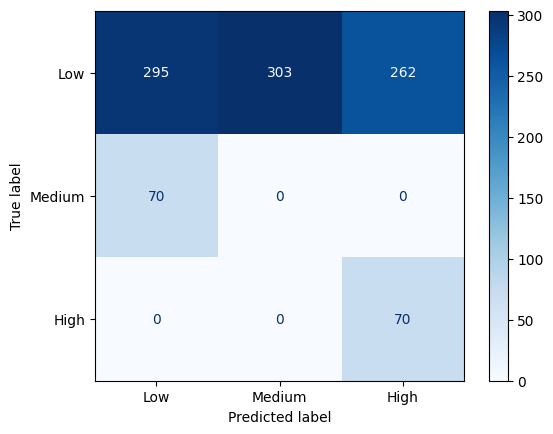

In [ ]:
labels = ['Low', 'Medium', 'High']

# Mostrar la matriz de confusión con etiquetas personalizadas
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')

In [ ]:
report = classification_report(scaled_data_df['cluster DBSCAN'], cancer_data['Level_encoded'])
print("Reporte de clasificación:\n", report)

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.34      0.48       860
           1       0.00      0.00      0.00        70
           2       0.21      1.00      0.35        70

    accuracy                           0.36      1000
   macro avg       0.34      0.45      0.28      1000
weighted avg       0.71      0.36      0.44      1000

